In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
#from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import plotly.express as px
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2

In [3]:
uploaded = files.upload()

Saving imgs.zip to imgs.zip


In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session =tf.compat.v1.InteractiveSession(config=config)

In [5]:
!ls

imgs.zip  sample_data


In [6]:
!unzip -q imgs.zip

In [3]:
path = "imgs"
class_names = sorted(os.listdir(path))
print(class_names)

['Coast', 'Desert', 'Forest', 'Glacier', 'Mountain']


In [4]:
num_skipped = 0
for folder_name in class_names:
    folder_path = os.path.join("imgs", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [5]:
class_dis = [len(os.listdir(path + "/" + name + "/")) for name in class_names]

In [6]:
fig = px.pie(names=class_names, values=class_dis, title="Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.5}})
fig.show()

In [3]:
datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2) 

train_ds = datagen.flow_from_directory('imgs',
                                       class_mode='categorical',
                                       batch_size=32,
                                       target_size=(128, 128),
                                       shuffle=True,
                                       subset="training")
val_ds = datagen.flow_from_directory('imgs',
                                      class_mode='categorical',
                                      batch_size=32,
                                      target_size=(128, 128),
                                      shuffle=True,
                                      subset="validation")

Found 8000 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


In [103]:
image_size = (128, 128)
batch_size = 32

train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    "imgs",
    validation_split=0.2,
    subset="training",
    seed=5,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds= tf.keras.preprocessing.image_dataset_from_directory(
    "imgs",
    validation_split=0.2,
    subset="validation",
    seed=5,
    image_size=image_size,
    batch_size=batch_size,
)

Found 10000 files belonging to 5 classes.
Using 8000 files for training.
Found 10000 files belonging to 5 classes.
Using 2000 files for validation.


In [48]:
images, _ = next(train_ds)

c:\Users\mosul\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


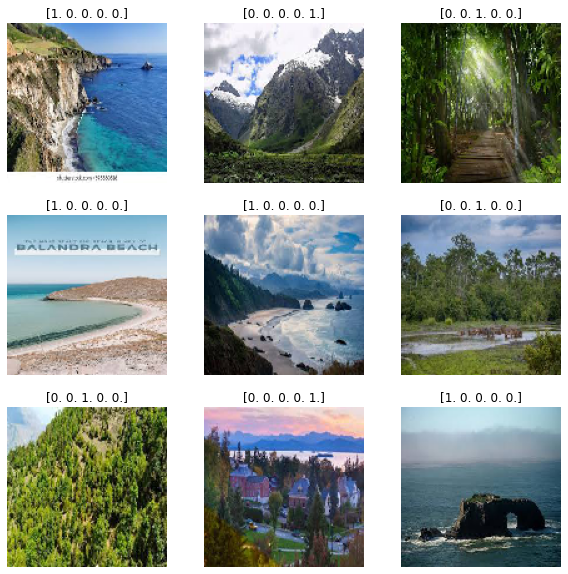

In [31]:
plt.figure(figsize=(10, 10))
for i in range(9): 
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(_[i])
    plt.axis("off")
plt.show()

In [104]:
train_ds = train_ds.map(lambda x,y: (x/255, y))


In [105]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [39]:
print(image_size)

(128, 128)


In [29]:
model = Sequential()

Model 1

In [30]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(256,(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

Model 2

In [ ]:
# model.add(data_augmentation)
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(5, activation='softmax'))

# model.compile(
#     optimizer=keras.optimizers.Adam(1e-3),
#     loss="categorical_crossentropy",
#     metrics=["accuracy"],
# )

# model.build((None, 128,128,3))
# model.summary()

Model 3

In [ ]:
# from keras.optimizers import SGD
# from tensorflow.keras import regularizers

# model.add(data_augmentation)
# model.add(Conv2D(32, (3, 3), 1, activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.4))

# model.add(Conv2D(64, (3, 3), 1, activation='relu', kernel_initializer='he_uniform', padding="same"))
# model.add(MaxPooling2D())
# model.add(Dropout(0.4))

# model.add(Conv2D(128, (3, 3), 1, activation='relu', kernel_initializer='he_uniform', padding="same"))
# model.add(MaxPooling2D())
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(Dropout(0.4))
# model.add(Dense(5, activation='softmax'))

# opt = SGD(lr=0.001, momentum=0.9, decay=1e-6, nesterov=True)
# model.compile(
#     optimizer=opt,
#     loss="categorical_crossentropy",
#     metrics=["accuracy"],
# )

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                        

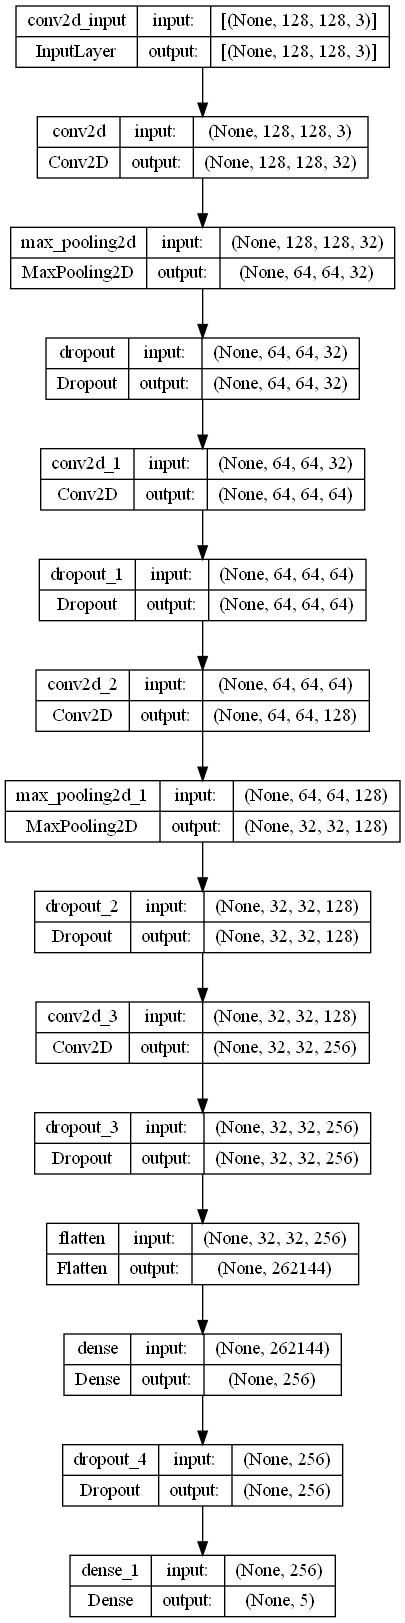

In [11]:
keras.utils.plot_model(model, show_shapes=True)

Model 1 train

In [ ]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Model 2 train

In [ ]:
# epochs = 40

# callbacks = [
#     keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
# ]

# history = model.fit(
#     train_ds,
#     epochs=epochs,
#     callbacks=callbacks,
#     validation_data=val_ds,
# )

Model 3 train

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# epochs = 80

# callbacks = [
#     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
# ]

# history = model.fit(
#     train_ds,
#     steps_per_epoch=len(train_ds),
#     epochs=epochs,
#     validation_data=val_ds,
#     validation_steps=len(val_ds),
#     callbacks=callbacks
# )

In [132]:
model.save('model_trained.h5')

In [14]:
model = tf.keras.models.load_model("models_books/model_trained.h5")

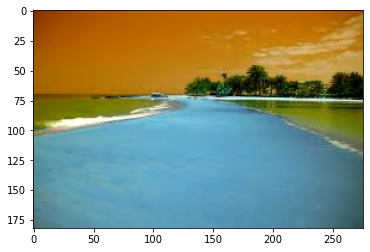

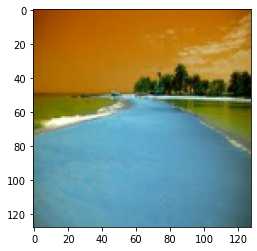

In [19]:
img = cv2.imread('test/1.jpeg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (128,128))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [68]:
CATEGORIES = ["Coast", "Desert", "Forest", "Glacier", "Mountain"]

In [113]:
prediction = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 3s 3s/step


In [114]:
for i in prediction[0]:
    print(i)
print("PREDICTED: ", max(prediction[0]))


0.7409135
0.001904637
0.106084965
0.010979657
0.14011715
PREDICTED:  0.7409135


In [159]:
res = {CATEGORIES[i]: prediction[0][i] for i in range(len(CATEGORIES))}
 

for item in res.items():
    print(item[0] + ": " + str(item[1]))
print()
print("PREDICTED")
print(list(res.keys())[list(res.values()).index(max(res.values()))] + ": "+ str(max(res.values())))

Coast: 0.7409135
Desert: 0.001904637
Forest: 0.106084965
Glacier: 0.010979657
Mountain: 0.14011715

PREDICTED
Coast: 0.7409135


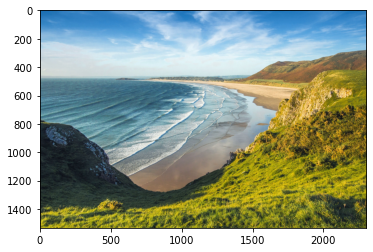

1/1 [==============================] - 1s 1s/step
Coast: 4.6110556e-14
Desert: 0.99831784
Forest: 3.8515854e-11
Glacier: 8.0585295e-12
Mountain: 0.0016822226

PREDICTED
Desert: 0.99831784


In [57]:
import matplotlib.image as mpimg
CATEGORIES = ["Coast", "Desert", "Forest", "Glacier", "Mountain"]
def predict(name):
    #img = cv2.imread(name)
    img = mpimg.imread(name)
    resize = tf.image.resize(img, (128,128))
    plotimg = mpimg.imread(name)
    #plt.imshow(resize.numpy().astype(int))
    plt.imshow(plotimg)
    plt.show()
    prediction = model.predict(np.expand_dims(resize/255, 0))
    res = {CATEGORIES[i]: prediction[0][i] for i in range(len(CATEGORIES))}
    for item in res.items():
        print(item[0] + ": " + str(item[1]))
    print()
    print("PREDICTED")
    print(list(res.keys())[list(res.values()).index(max(res.values()))] + ": "+ str(max(res.values())))

predict("test/test9.png")

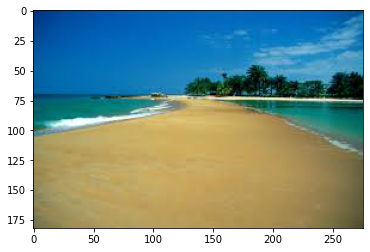

1/1 [==============================] - 1s 1s/step
Coast: 0.88122314
Desert: 0.11877626
Forest: 8.5416826e-11
Glacier: 3.3956488e-07
Mountain: 1.6754272e-07

PREDICTED
Coast: 0.88122314


In [58]:
predict("test/1.jpeg")

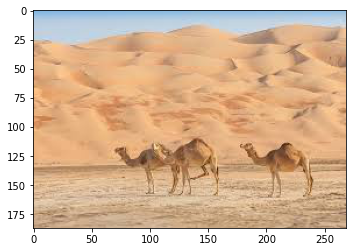

1/1 [==============================] - 1s 1s/step
Coast: 0.0010963159
Desert: 0.9987112
Forest: 8.401461e-09
Glacier: 8.045543e-07
Mountain: 0.00019158829

PREDICTED
Desert: 0.9987112


In [62]:
predict("test/2.jpeg")

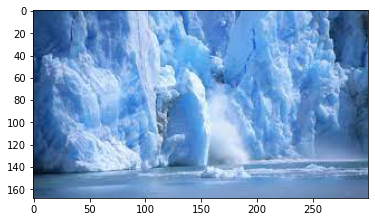

1/1 [==============================] - 1s 1s/step
Coast: 0.005722588
Desert: 0.00061728875
Forest: 5.537395e-05
Glacier: 0.8058246
Mountain: 0.18778019

PREDICTED
Glacier: 0.8058246


In [52]:
predict("test/3.jpeg")

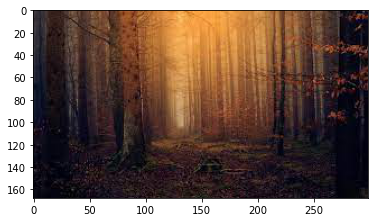

1/1 [==============================] - 1s 1s/step
Coast: 0.03969919
Desert: 0.0067336406
Forest: 0.76001996
Glacier: 0.0018862599
Mountain: 0.19166096

PREDICTED
Forest: 0.76001996


In [64]:
predict("test/4.jpeg")

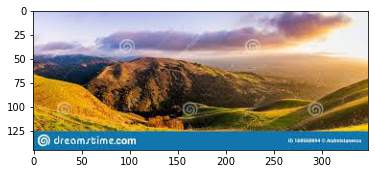

1/1 [==============================] - 1s 1s/step
Coast: 0.091291495
Desert: 0.0070359106
Forest: 0.002539025
Glacier: 0.004196745
Mountain: 0.8949368

PREDICTED
Mountain: 0.8949368


In [54]:
predict("test/5.jpeg")

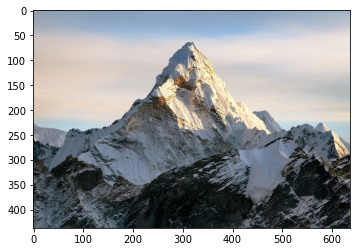

1/1 [==============================] - 1s 1s/step
Coast: 4.6202693e-14
Desert: 0.9983285
Forest: 4.2903788e-11
Glacier: 7.839335e-12
Mountain: 0.0016715052

PREDICTED
Desert: 0.9983285


In [60]:
predict("test/test.png")

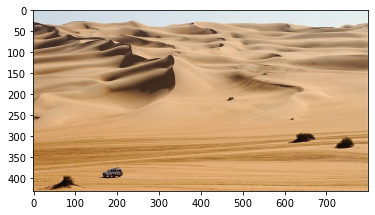

1/1 [==============================] - 1s 1s/step
Coast: 7.07148e-14
Desert: 0.9981244
Forest: 5.7165193e-11
Glacier: 1.2293005e-11
Mountain: 0.0018755989

PREDICTED
Desert: 0.9981244


In [61]:
predict("test/test2.png")

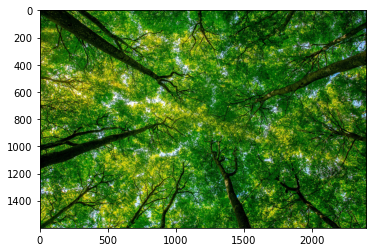

1/1 [==============================] - 1s 1s/step
Coast: 3.5351777e-14
Desert: 0.99859244
Forest: 3.3698613e-11
Glacier: 6.3094785e-12
Mountain: 0.0014074937

PREDICTED
Desert: 0.99859244


In [59]:
predict("test/test6.png")

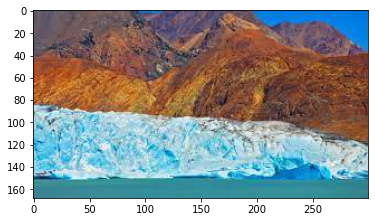

1/1 [==============================] - 1s 1s/step
Coast: 0.33965504
Desert: 0.0018594546
Forest: 0.00074596866
Glacier: 0.41191298
Mountain: 0.24582659

PREDICTED
Glacier: 0.41191298


In [65]:
predict("test/test7.jpeg")

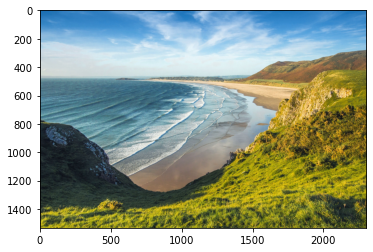

1/1 [==============================] - 1s 1s/step
Coast: 0.6717097
Desert: 0.00022346292
Forest: 6.169438e-08
Glacier: 0.32400978
Mountain: 0.004056976

PREDICTED
Coast: 0.6717097


In [45]:
predict("test/test9.png")

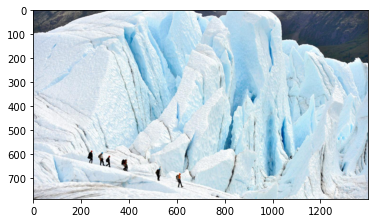

1/1 [==============================] - 1s 1s/step
Coast: 6.2739864e-06
Desert: 2.786418e-17
Forest: 1.144769e-19
Glacier: 0.99999297
Mountain: 7.143219e-07

PREDICTED
Glacier: 0.99999297


In [63]:
predict("test/8.jpg")

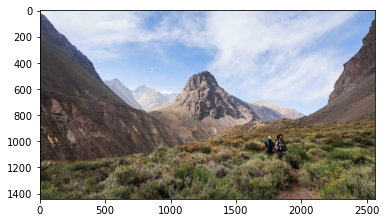

1/1 [==============================] - 1s 1s/step
Coast: 0.3808566
Desert: 7.854637e-05
Forest: 0.0498456
Glacier: 0.014735082
Mountain: 0.5544842

PREDICTED
Mountain: 0.5544842


In [66]:
predict("test/9.jpg")

In [12]:
accuracy = []
loss = []
with open('D:\\Uni\\CSML 1 SEM 1\\Machine Learning\\p2\\text\\text.txt', 'r') as f:
    for line in f:
        accuracy.append(float(line.strip().partition("accuracy: ")[2]))
        loss.append(float(line.strip().partition("loss: ")[2].split()[0]))
print(accuracy)
print(loss)

val_accuracy = []
val_loss = []

with open('D:\\Uni\\CSML 1 SEM 1\\Machine Learning\\p2\\text\\text1.txt', 'r') as f:
    for line in f:
        val_accuracy.append(float(line.strip().partition("val_accuracy: ")[2]))
        val_loss.append(float(line.strip().partition("val_loss: ")[2].split()[0]))
print(val_accuracy)
print(val_loss)

[0.5479, 0.6727, 0.6866, 0.7059, 0.7174, 0.7205, 0.7318, 0.7471, 0.7549, 0.7604, 0.7815, 0.799, 0.8254, 0.8361, 0.8485, 0.8661, 0.8801, 0.8979, 0.9015, 0.9112, 0.9184, 0.9241, 0.9284, 0.9342, 0.9362]
[1.2177, 0.8741, 0.8414, 0.7978, 0.7787, 0.756, 0.7261, 0.6931, 0.6521, 0.6336, 0.5932, 0.5508, 0.4805, 0.4432, 0.4135, 0.3665, 0.3365, 0.2838, 0.2702, 0.2503, 0.2327, 0.2169, 0.2033, 0.187, 0.1812]
[0.661, 0.6575, 0.7075, 0.7055, 0.709, 0.7065, 0.707, 0.723, 0.723, 0.708, 0.736, 0.7065, 0.7285, 0.736, 0.739, 0.726, 0.7215, 0.71, 0.7145, 0.721, 0.7025, 0.7165, 0.719, 0.71, 0.7205]
[0.9205, 0.8912, 0.7905, 0.7799, 0.7691, 0.7781, 0.7686, 0.7553, 0.7518, 0.7806, 0.7407, 0.8653, 0.7774, 0.8477, 0.8516, 0.9072, 0.9919, 1.078, 1.3842, 1.2274, 1.4963, 1.2752, 1.145, 1.5641, 1.3838]


In [13]:
epochs = []
for i in range(1, 26):
    epochs.append(i)
print(epochs)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


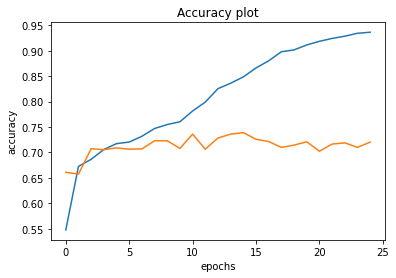

Text(0, 0.5, 'loss')

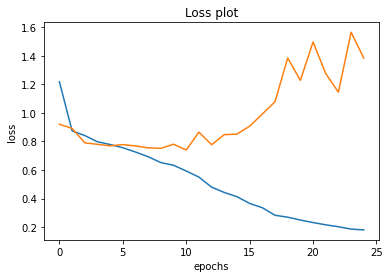

In [14]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Accuracy plot')
plt.xlabel("epochs")
plt.ylabel('accuracy')
plt.show()

plt.plot(loss)
plt.plot(val_loss)
plt.title("Loss plot")
plt.xlabel("epochs")
plt.ylabel('loss')


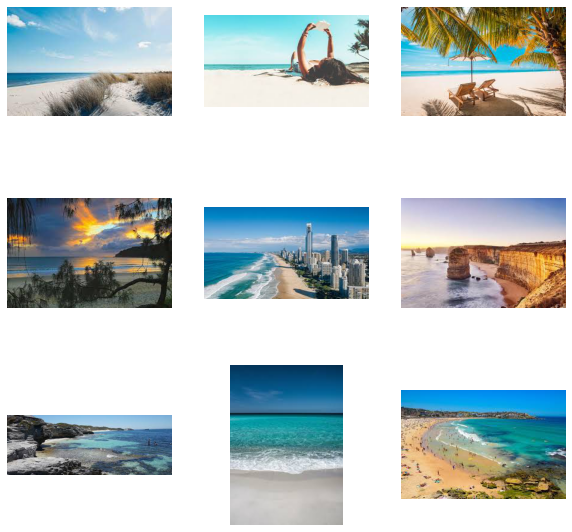

In [4]:
import matplotlib.image as mpimg
images=[]
plt.figure(figsize=(10, 10))
i = 1
for filename in os.listdir('imgs/Coast'):
    if i > 9: 
        break
    images.append(mpimg.imread('imgs/Coast/' + filename))
    i += 1

for i, image in enumerate(images):
    if i > 9: 
        break
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis("off")
    i += 1

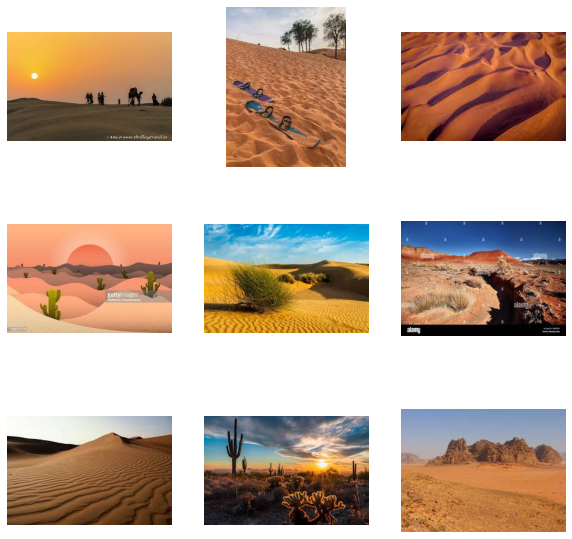

In [4]:
images=[]
plt.figure(figsize=(10, 10))
i = 1
for filename in os.listdir('imgs/Desert'):
    if i > 9: 
        break
    images.append(mpimg.imread('imgs/Desert/' + filename))
    i += 1

for i, image in enumerate(images):
    if i > 9: 
        break
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis("off")
    i += 1

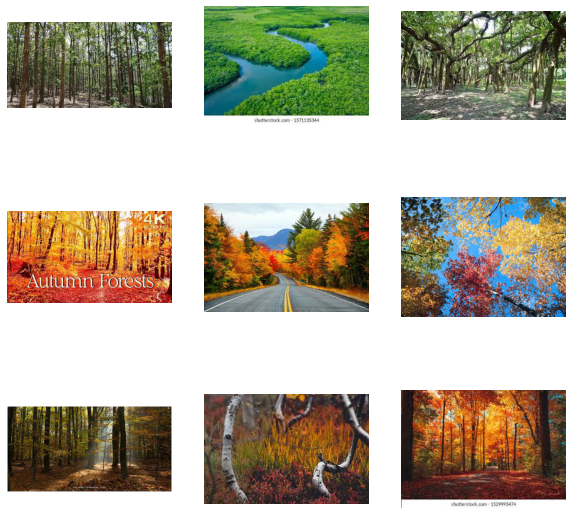

In [11]:
images=[]
plt.figure(figsize=(10, 10))
i = 1
for filename in os.listdir('imgs/Forest'):
    if i > 9: 
        break
    images.append(mpimg.imread('imgs/Forest/' + filename))
    i += 1

for i, image in enumerate(images):
    if i > 9: 
        break
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis("off")
    i += 1

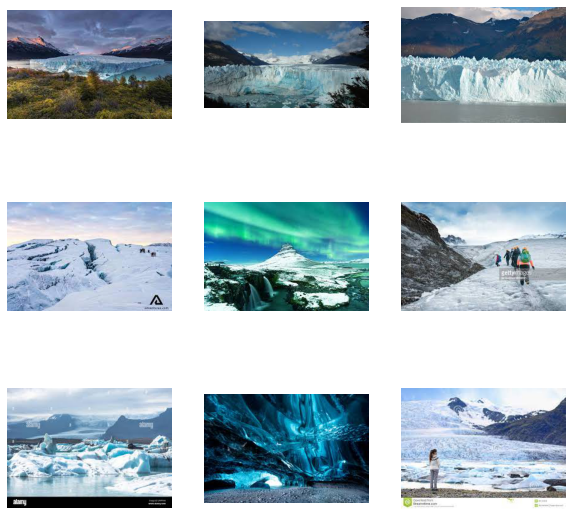

In [6]:
images=[]
plt.figure(figsize=(10, 10))
i = 1
for filename in os.listdir('imgs/Glacier'):
    if i > 9: 
        break
    images.append(mpimg.imread('imgs/Glacier/' + filename))
    i += 1

for i, image in enumerate(images):
    if i > 9: 
        break
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis("off")
    i += 1

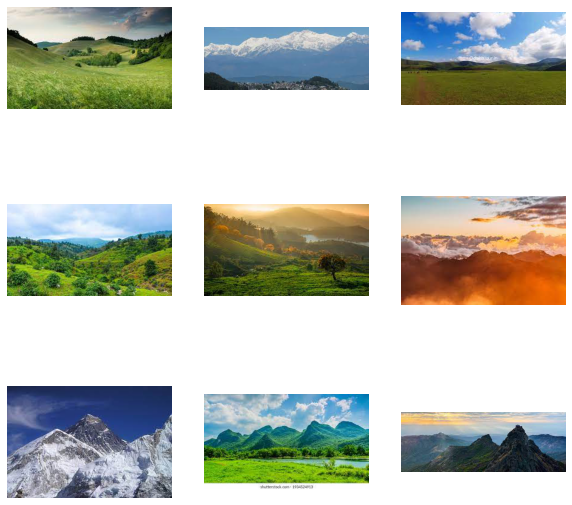

In [7]:
images=[]
plt.figure(figsize=(10, 10))
i = 1
for filename in os.listdir('imgs/Mountain'):
    if i > 9: 
        break
    images.append(mpimg.imread('imgs/Mountain/' + filename))
    i += 1

for i, image in enumerate(images):
    if i > 9: 
        break
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis("off")
    i += 1

In [4]:
model = tf.keras.models.load_model("models_books/model_trained.h5")

In [5]:
predictions = model.predict(val_ds)

63/63 [==============================] - 35s 502ms/step


In [6]:
class_p = np.argmax(predictions, axis = 1)

In [7]:
print(val_ds.class_indices)

{'Coast': 0, 'Desert': 1, 'Forest': 2, 'Glacier': 3, 'Mountain': 4}


In [13]:
for i in class_p:
    print(i)

2
1
2
3
3
3
1
1
1
3
2
3
0
4
3
0
1
3
0
2
1
0
4
3
0
3
4
2
3
2
2
0
0
3
3
0
1
0
2
2
3
4
2
2
4
2
0
2
3
4
1
0
1
0
3
4
3
1
0
3
3
0
3
2
1
3
1
4
4
1
1
0
2
4
2
3
4
2
3
1
3
3
3
4
0
0
1
4
0
0
4
0
0
1
1
2
0
4
0
0
2
0
0
2
1
1
2
1
2
0
2
0
3
3
1
4
0
1
3
1
2
1
4
2
1
0
3
0
2
2
0
0
1
0
1
1
3
0
1
1
0
0
1
3
4
3
1
4
0
3
1
3
3
0
2
1
3
4
3
0
4
2
3
0
2
1
3
3
2
4
0
2
4
1
3
4
3
0
3
0
4
0
0
2
0
1
3
3
4
3
0
0
3
1
1
0
2
3
2
3
4
2
3
1
3
2
3
0
4
3
1
1
2
0
3
4
3
1
2
1
0
3
1
2
0
0
4
4
3
0
3
4
1
3
4
4
0
1
4
0
2
0
1
3
1
3
2
4
0
3
1
1
0
4
0
3
2
2
2
4
4
4
3
4
3
3
0
0
1
1
3
0
1
1
2
1
3
1
3
2
1
3
1
4
4
4
1
4
4
4
1
3
1
4
3
1
3
0
3
3
1
1
0
1
4
0
4
4
3
1
0
3
2
4
3
1
2
0
0
1
3
1
3
3
2
0
3
3
1
3
4
2
1
0
0
3
1
1
2
2
2
0
3
3
0
2
4
1
4
4
4
1
2
2
0
3
3
1
2
1
2
2
0
2
0
0
1
2
2
3
2
4
3
0
1
0
0
3
1
3
3
4
1
0
2
2
4
2
2
1
2
3
2
4
1
1
3
4
3
4
0
0
2
0
0
4
2
0
1
4
0
3
3
0
3
4
0
4
1
1
1
2
2
0
1
3
0
3
2
4
0
0
3
0
1
2
3
1
0
2
1
4
0
1
0
4
4
0
2
3
1
2
2
2
0
1
4
0
0
0
0
2
3
2
1
2
3
0
1
2
2
3
0
3
1
0
0
0
0
1
0
4
0
4
3
0
3
0
2
1
3
3
1
0
2
2
0
3
1
4


In [9]:
for i in val_ds.classes:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
